In [1]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X_data = iris["data"][:,(2,3)]
y_data = iris["target"]

sentosa_or_versicolor = (y_data==0) | (y_data==1)
X = X_data[ sentosa_or_versicolor]
y = y_data[ sentosa_or_versicolor]

svm_clf=SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X,y)

SVC(C=inf, kernel='linear')

In [2]:
import numpy as np

x0=np.linspace( 0 , 5.5, 200 )

pred_1=5*x0-20
pred_2=x0-1.8
pred_3=0.1*x0+0.5

In [3]:
import matplotlib.pyplot as plt
def plot_svm_decision_boundary(svm_clf, xmin, xmax, axes=plt):
  w, b=svm_clf.coef_[0], svm_clf.intercept_[0]

  x0 = np.linspace( xmin, xmax, 200)
  decision_boundary = -(w[0]*x0+b)/w[1]

  gutter_up= -(w[0]*x0+b+1)/w[1]
  gutter_down= -(w[0]*x0+b-1)/w[1]

  svs = svm_clf.support_vectors_

  axes.scatter(svs[:,0],svs[:,1], s=180, facecolors='#FFAAAA')
  axes.plot(x0, decision_boundary,'k-', linewidth=2)
  axes.plot(x0, gutter_up, 'y--', linewidth=2)
  axes.plot(x0, gutter_down, 'b--', linewidth=2)


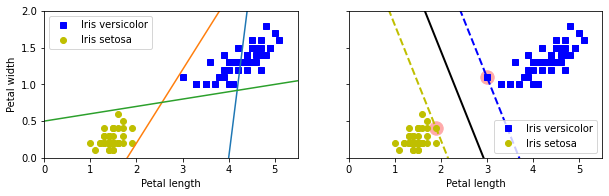

In [4]:
# X.shape, y.shape
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10, 2.7))

for ax in axes.ravel():
  plt.sca(ax)
  ax.plot(X[:,0][y==1],X[:,1][y==1],'bs', label='Iris versicolor')
  ax.plot(X[:,0][y==0],X[:,1][y==0],'yo', label='Iris setosa')
  ax.legend()
  ax.set_xlabel('Petal length')
  ax.axis([ 0, 5.5, 0, 2])
axes[0].set_ylabel('Petal width')
axes[0].plot(x0, pred_1)
axes[0].plot(x0, pred_2)
axes[0].plot(x0, pred_3)
plot_svm_decision_boundary(svm_clf, xmin=0, xmax=5.5, axes=axes[1])

plt.show()

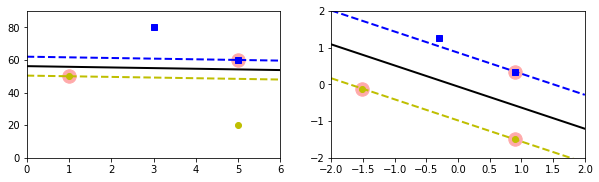

In [5]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

svm_clf=SVC(kernel='linear', C=100)

fig, axes= plt.subplots(1,2, figsize=(10,2.7))

svm_clf.fit(Xs, ys)
axes[0].plot(Xs[:,0][ys==1],Xs[:,1][ys==1],'bs')
axes[0].plot(Xs[:,0][ys==0],Xs[:,1][ys==0],'yo')
plot_svm_decision_boundary(svm_clf, xmin=0, xmax=6, axes=axes[0])
axes[0].axis([ 0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(Xs)
svm_clf.fit(X_scaler, ys)

axes[1].plot(X_scaler[:,0][ys==1],X_scaler[:,1][ys==1],'bs')
axes[1].plot(X_scaler[:,0][ys==0],X_scaler[:,1][ys==0],'yo')
plot_svm_decision_boundary(svm_clf, xmin=-2, xmax=2, axes=axes[1])
axes[1].axis([ -2, 2, -2, 2])

plt.show()

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

X = iris["data"][ : , (2,3)]
y = (iris["target"] == 2).astype(np.float64)

pip_svm=Pipeline([
    ('scaler', StandardScaler()),
    ('linearSVC', LinearSVC(C=1, loss="hinge", random_state=42))
])

pip_svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearSVC', LinearSVC(C=1, loss='hinge', random_state=42))])

[-9.76355008] 
 [0.92831448 3.14319431]


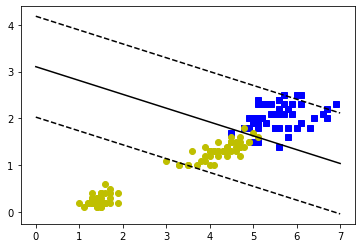

In [7]:
plt.plot(X[:,0][y==1.],X[:,1][y==1.],'bs')
plt.plot(X[:,0][y==0.],X[:,1][y==0.],'yo')

scale = pip_svm.named_steps['scaler'].scale_
mean = pip_svm.named_steps['scaler'].mean_
b = pip_svm.named_steps['linearSVC'].decision_function([-mean/scale])
w = pip_svm.named_steps['linearSVC'].coef_[0]/scale

print(b,'\n',w)
x0 = np.linspace( 0, 7, 200)

decision_boundary = -(w[0]*x0+b)/w[1]
gutter_up=decision_boundary+1/w[0]
gutter_down=decision_boundary-1/w[0]
plt.plot(x0,decision_boundary,'k-')
plt.plot(x0,gutter_up,'k--')
plt.plot(x0,gutter_down,'k--')

In [8]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC( C = 100, loss = "hinge", random_state = 42)
pip_svm1 = Pipeline([
    ('scaler', scaler),
    ('LinearSVC', svm_clf1)
])
pip_svm2 = Pipeline([
    ('scaler', scaler),
    ('LinearSVC', svm_clf2)
])
pip_svm1.fit(X,y)
pip_svm2.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('scaler', StandardScaler()),
                ('LinearSVC', LinearSVC(C=100, loss='hinge', random_state=42))])

In [9]:
b1 = svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_/scaler.scale_])

w1 = svm_clf1.coef_[0]/scaler.scale_
w2 = svm_clf2.coef_[0]/scaler.scale_

t = y * 2 - 1
support_vectors_id1 = (t * (X.dot(w1)+b1) < 1).ravel()
support_vectors_id2 = (t * (X.dot(w2)+b2) < 1).ravel()

svm_clf1.intercept_ = np.array([b1])
svm_clf1.coef_ = np.array([w1])
svm_clf1.support_vectors_ = X[support_vectors_id1]

svm_clf2.intercept_ = np.array([b2])
svm_clf2.coef_ = np.array([w2])
svm_clf2.support_vectors_ = X[support_vectors_id2]

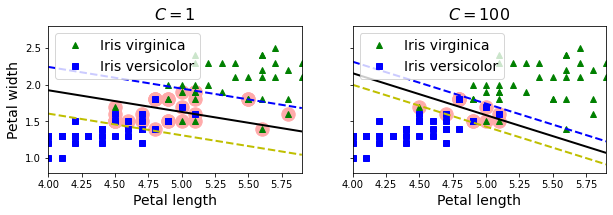

In [10]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize = (10, 2.7))

for ax in axes.ravel():
  plt.sca(ax)
  ax.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
  ax.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
  ax.set_xlabel("Petal length", fontsize=14)
  ax.legend(loc="upper left", fontsize=14)
  ax.axis([4, 5.9, 0.8, 2.8])
axes[0].set_ylabel("Petal width", fontsize=14)

plot_svm_decision_boundary(svm_clf1, 4, 5.9, axes[0])
axes[0].set_title("$C = {}$".format(svm_clf1.C), fontsize=16)

plot_svm_decision_boundary(svm_clf2, 4, 5.9, axes[1])
axes[1].set_title("$C = {}$".format(svm_clf2.C), fontsize=16)

plt.show()

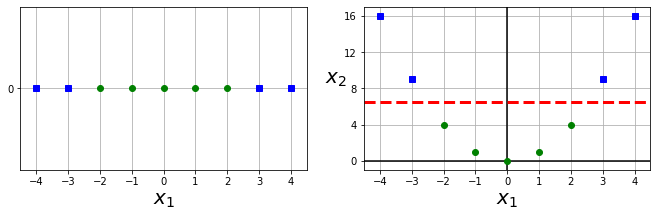

In [11]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
# print(X1D, '\n',X2D)

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.grid(True, which='both')
plt.gca().get_yaxis().set_ticks([0])
# plt.axhline(y=0, color='k')
plt.plot(X1D[y==0], np.zeros(4),'bs')
plt.plot(X1D[y==1], np.zeros(5), 'go')
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "go")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
plt.show()

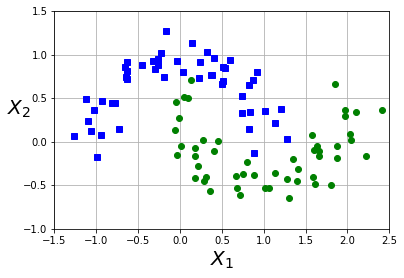

In [12]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'go')
plt.grid(True, which='both')
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20, rotation=0)
plt.axis([-1.5, 2.5, -1, 1.5])
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_svm = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('LinearSVC', LinearSVC(C=5, loss='hinge', random_state=42))
])
poly_svm.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('LinearSVC', LinearSVC(C=5, loss='hinge', random_state=42))])

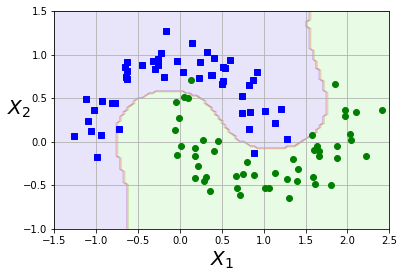

In [14]:
def plot_predictions(clf, axes):
  x0s = np.linspace(axes[0], axes[1], 100)
  x1s = np.linspace(axes[2], axes[3], 100)
  x0, x1 = np.meshgrid(x0s, x1s)
  X = np.c_[x0.ravel(), x1.ravel()]
  y_pred = clf.predict(X).reshape(x0.shape)
  y_decision = clf.decision_function(X).reshape(x0.shape)
  plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.1)
  # cs=plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)
  # plt.clabel(cs, inline=5, fontsize=10)

plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])

plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'go')
plt.grid(True, which='both')
plt.xlabel(r'$X_1$', fontsize=20)
plt.ylabel(r'$X_2$', fontsize=20, rotation=0)
plt.axis([-1.5, 2.5, -1, 1.5])

plt.show()

In [15]:
from sklearn.svm import SVC
kernel_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=3, coef0=1, C=5))
])
kernel_poly.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=5, coef0=1, kernel='poly'))])

In [16]:
kernel_poly100 = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC(kernel='poly', degree=10, coef0=100, C=5))
])
kernel_poly100.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

In [17]:
def plot_dataset(X, y, axes):
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
  plt.axis(axes)
  plt.grid(True, which='both')
  plt.xlabel(r"$x_1$", fontsize=20)
  plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

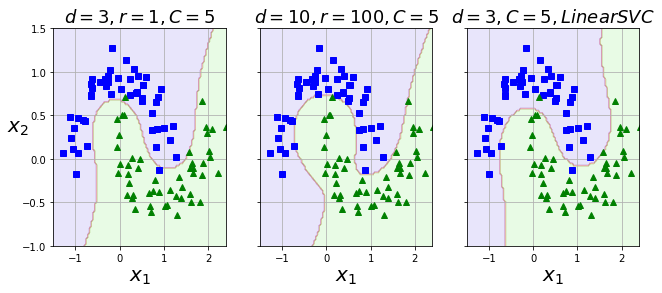

In [18]:
fig, axes = plt.subplots(1,3, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(kernel_poly, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(kernel_poly100, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.sca(axes[2])
plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, C=5, LinearSVC$", fontsize=18)
plt.ylabel("")

plt.show()

In [19]:
kernel_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_clf', SVC(kernel='rbf', gamma=5, C=0.001))
])
kernel_rbf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rbf_clf', SVC(C=0.001, gamma=5))])

Text(0, 0.5, '')

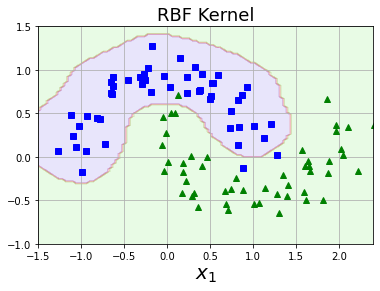

In [20]:
plot_predictions(kernel_rbf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"RBF Kernel", fontsize=18)
plt.ylabel("")

In [21]:
gammas = [0.1, 5, 5, 0.1]
Cs = [0.001, 1000, 0.001, 1000]
svm_clfs = []
for gamma, C in zip(gammas, Cs):
  # print(gamma, C)
  pip_clf = Pipeline([
      ('scaler', StandardScaler()),
      ('svm_rbf', SVC(kernel='rbf', gamma=gamma, C=C))
  ])
  pip_clf.fit(X,y)
  svm_clfs.append(pip_clf)
  print('Gamma={0}, C={1}'.format(gamma,C))

Gamma=0.1, C=0.001
Gamma=5, C=1000
Gamma=5, C=0.001
Gamma=0.1, C=1000


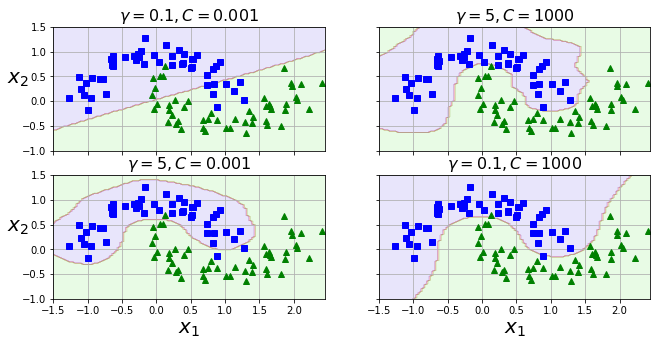

In [22]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.7, 5))
for i, ax, svm_clf in zip(range(4), axes.ravel(), svm_clfs):
  # print(i)
  plt.sca(ax)
  plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
  plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
  C, gamma = svm_clf['svm_rbf'].C, svm_clf['svm_rbf'].gamma
  plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
  if i in (0, 1):
      plt.xlabel("")
  if i in (1, 3):
      plt.ylabel("")




In [23]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [24]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5, random_state=42)

In [25]:
svm_reg_15 = LinearSVR( epsilon=1.5, random_state=42)
svm_reg_05 = LinearSVR( epsilon=0.5, random_state=42)

svm_reg_15.fit(X,y)
svm_reg_05.fit(X,y)

LinearSVR(epsilon=0.5, random_state=42)

In [26]:
def find_support_vectors(svm_reg, X, y):
  y_hat = svm_reg.predict(X)
  off_margin = (np.abs(y - y_hat) >= svm_reg.epsilon)
  return np.argwhere(off_margin)

svm_reg_15.support_ = find_support_vectors(svm_reg_15, X, y)
svm_reg_05.support_ = find_support_vectors(svm_reg_05, X, y)

svm_reg_15.predict([[1]])

array([6.52640746])

In [27]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)


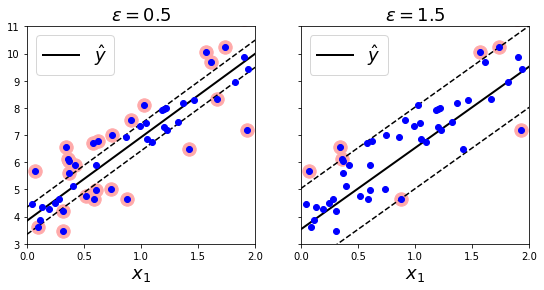

In [29]:
fig, axes = plt.subplots(1, 2, sharey= True, figsize=(9,4))

plt.sca(axes[0])
plot_svm_regression(svm_reg_05, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_05.epsilon), fontsize=18)

plt.sca(axes[1])
plot_svm_regression(svm_reg_15, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg_15.epsilon), fontsize=18)


plt.show()

In [31]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
X.shape, y.shape

((100, 1), (100,))

In [32]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

In [33]:
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")

svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, degree=2, kernel='poly')

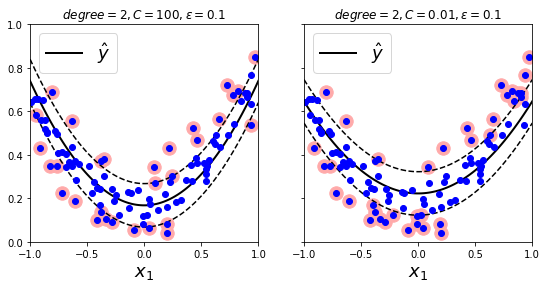

In [37]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(9,4))

plt.sca(axes[0])
plt.title(r"$degree = {}, C = {}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon))
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])

plt.sca(axes[1])
plt.title(r"$degree = {}, C = {}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon))
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])